In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

from sklearn.metrics import r2_score
import os
import subprocess

class my_model(BaseEstimator):

    #def __init__(self):
     #   self.demo_param = demo_param

    def fit(self, X, y):

        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        # Store the classes seen during fit
        #self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    

        
        
    def predict(self, X):
        inputs = len(X[0])
        outputs = 1
        y = self.y_
        with open('temp.data', 'w') as csvfile:
            csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X)) +",\n")
            for xx, yy in zip(X, y):
                zz = [*xx, yy]
                line = str(zz)[1:-1]+",\n"
                csvfile.write(line)
        proc = subprocess.Popen(['get_y', 'temp.data', 'train03.data', 'train07.data'], stdout=subprocess.PIPE)
        val = proc.communicate()[0].decode("utf-8")
        split_val = [float(s) for s in val.split()]
        
        return np.asarray(split_val)
    
    def score(self, X, y):
        return sum(self.predict(X)-y)/len(y)
        

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
model = my_model().fit(X,y)
pred_y = model.predict(X)
model.score(X,y)

0.03791176333333467

In [3]:
X[0][6]

0.0

In [4]:
z = [[[(lambda i: xx+0.1*k if i >= 7 and (i-7) % 5 ==1 and (i-7) < 125 else xx)(i) for i, xx in enumerate(x)] for x in X] for k in range(20)]

In [5]:
model = my_model().fit(X,y)
canon = model.predict(X)
errors = []
for zz in z:
    model = my_model().fit(zz,canon)
    pred_y = model.predict(zz)
    errors.append(model.score(zz,canon))
    

In [6]:
errors

[0.0,
 0.502844446666663,
 2.173740783333334,
 -13.985591816666611,
 -2.7998361566666636,
 -1.8200610166666722,
 -1.4233079766666719,
 -1.181878023333336,
 -0.9920089833333403,
 -0.8062846033333378,
 -0.5808984000000001,
 -0.23208419333333283,
 0.5352648733333352,
 4.812022620000016,
 -5.456912613333346,
 -2.745781186666679,
 -2.085774633333334,
 -1.8081892166666702,
 -1.6432146733333384,
 -1.5331542166666667]

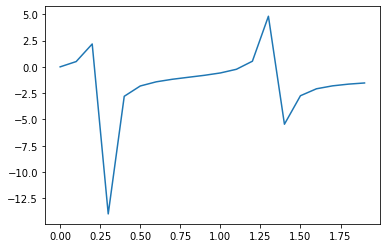

In [7]:
import matplotlib.pyplot as plt


x = np.arange(0,2.0, 0.1)
plt.plot(x,errors )
plt.show()

In [39]:
z = [[[(lambda i: xx+0.1*k if i >= 7 and (i-7) % 5 ==2 and (i-7) < 125 else xx)(i) for i, xx in enumerate(x)] for x in X] for k in range(20)]

In [33]:
model = my_model().fit(X,y)
canon = model.predict(X)
errors = []
for zz in z:
    model = my_model().fit(zz,canon)
    pred_y = model.predict(zz)
    errors.append(model.score(zz,canon))
    

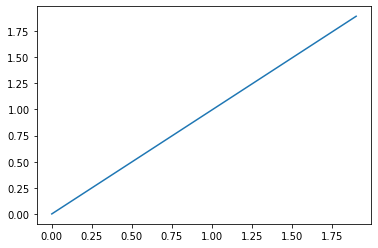

In [34]:
import matplotlib.pyplot as plt


x = np.arange(0,2.0, 0.1)
plt.plot(x,errors )
plt.show()

In [77]:
test = [1,2,8]
for t in test:
    test[test.index(t)] = t + 1

In [78]:
test

[3, 2, 9]